In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("data.csv")

In [13]:
for columns in df.columns:
    print(columns)

transaction_id
sender_id
receiver_id
timestamp
amount
source
device_os
browser
zip_code
merchant_category
ip_address
session_id
account_age_days
is_international
country_code
device_fingerprint
time_since_last_txn
amount_velocity
amount_to_average_ratio
device_match
merchant_risk_level
fraud_bool
pattern
hour_of_day
day_of_week
is_weekend
month
transaction_date


In [14]:
new_df = df.copy()

In [15]:
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 1001227
Number of columns: 28


In [16]:
df['fraud_bool'].value_counts()

fraud_bool
0    989720
1     11507
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001227 entries, 0 to 1001226
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   transaction_id           1001227 non-null  object 
 1   sender_id                1001227 non-null  object 
 2   receiver_id              1001227 non-null  object 
 3   timestamp                1001227 non-null  object 
 4   amount                   1001227 non-null  float64
 5   source                   1001227 non-null  object 
 6   device_os                1001227 non-null  object 
 7   browser                  1001227 non-null  object 
 8   zip_code                 1001227 non-null  int64  
 9   merchant_category        1001227 non-null  object 
 10  ip_address               1001227 non-null  object 
 11  session_id               1001227 non-null  object 
 12  account_age_days         1001227 non-null  int64  
 13  is_international         999748 non-null  

In [18]:
df.nunique()

transaction_id             1001227
sender_id                     4000
receiver_id                   4000
timestamp                   448157
amount                       48012
source                           5
device_os                        8
browser                          6
zip_code                      4009
merchant_category               15
ip_address                    4096
session_id                 1001209
account_age_days              1372
is_international                 2
country_code                     8
device_fingerprint           45571
time_since_last_txn         578880
amount_velocity             845848
amount_to_average_ratio     999674
device_match                     2
merchant_risk_level              5
fraud_bool                       2
pattern                         27
hour_of_day                     24
day_of_week                      7
is_weekend                       2
month                           12
transaction_date               365
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,1003335.0,69.069443,134.864847,0.0,14.680000,33.000000,74.810000,1.377549e+04
zip_code,1003335.0,51166.364266,28049.574028,505.0,26866.000000,51498.000000,76292.000000,9.993500e+04
account_age_days,1003335.0,762.302254,430.885502,30.0,389.000000,777.000000,1122.000000,1.500000e+03
merchant_risk_level,999480.0,2.175538,1.406167,1.0,1.000000,2.000000,3.000000,5.000000e+00
fraud_bool,1003335.0,0.012794,0.112386,0.0,0.000000,0.000000,0.000000,1.000000e+00
time_since_last_txn,999335.0,34.065215,79.173031,0.0,2.600000,7.033333,21.850000,1.881283e+03
amount_velocity,1003335.0,154.100031,6766.812930,0.0,0.998323,4.375000,17.330554,1.623708e+06
device_match,1003335.0,0.272033,0.445007,0.0,0.000000,0.000000,1.000000,1.000000e+00
amount_to_average_ratio,1003213.0,1.175822,2.528964,0.0,0.222118,0.523430,1.228780,4.236506e+02
hour_of_day,1003335.0,11.495678,6.921304,0.0,5.000000,11.000000,18.000000,2.300000e+01


### 1.1 Number of Transactions by Fraud Status

In [32]:
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts()).reset_index()
fraud_vals.columns = ['fraud_bool', 'count']
print(fraud_vals)

   fraud_bool   count
0           0  988971
1           1   11029


In [33]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

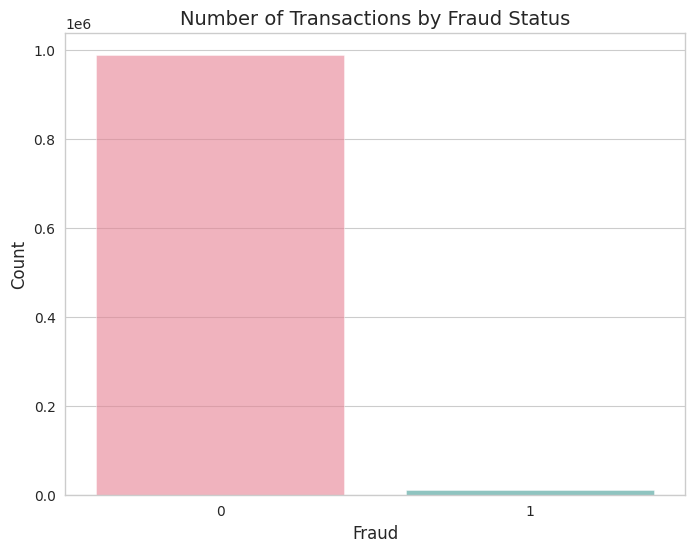

In [36]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6, hue="fraud_bool", legend=False)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()

The graph of the binary target feature reveals a highly imbalanced distribution, characterised by an extremely low prevalence of the positive class.

### 1.2 Missing Values of Features by Fraud Status

In [37]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            intended_balcon_amount  bank_months_count  \
fraud_bool                                              
0                            74.09              25.23   
1                            88.38              37.54   

            session_length_in_minutes  device_distinct_emails_8w  
fraud_bool                                                        
0                                0.20                       0.04  
1                                0.16                       0.04  


In [38]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                         feature  fraud_bool  missing_vals
0      prev_address_months_count           0         71.06
1      prev_address_months_count           1         91.89
2   current_address_months_count           0          0.43
3   current_address_months_count           1          0.13
4         intended_balcon_amount           0         74.09
5         intended_balcon_amount           1         88.38
6              bank_months_count           0         25.23
7              bank_months_count           1         37.54
8      session_length_in_minutes           0          0.20
9      session_length_in_minutes           1          0.16
10     device_distinct_emails_8w           0          0.04
11     device_distinct_emails_8w           1          0.04


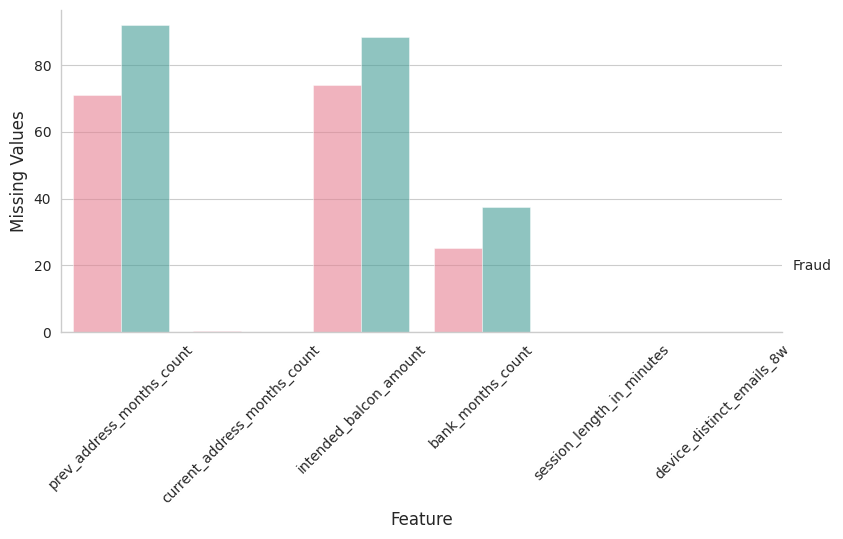

In [42]:
# Create bar plot
g = sns.catplot(
    data=missing_vals,
    kind="bar",
    x="feature",
    y="missing_vals",
    hue="fraud_bool",
    palette=my_palette,
    alpha=.6,
    height=4,
    aspect=2,
    legend=False
)

# Customize plot via FacetGrid
g.set_axis_labels("Feature", "Missing Values")
g.set_titles("Missing Values of Features by Fraud Status")
g.set_xticklabels(rotation=45)
g.add_legend(title="Fraud", fontsize=10)

plt.show()


When examining features like `prev_address_months_count`, `intended_balcon_amount`, and `bank_months_count`, it becomes apparent that a considerable number of missing values exist in their original distribution. However, despite these missing values, these features still hold informative value and exhibit correlation with the target feature.

It's important to highlight that the missing values in these features are actually represented by negative values and were not transformed into explicit missing values during preprocessing. The potential impact of such a transformation has not been evaluated, as it could potentially result in information loss, even though negative values themselves do not possess any specific meaning.

### 1.3 Distribution and Outliers of Features by Fraud Status

In [20]:
# Create a list of numeric features in the DataFrame df
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['transaction_id', 'sender_id', 'receiver_id', 'timestamp', 'amount', 'zip_code', 'merchant_category', 'ip_address', 'session_id', 'account_age_days', 'device_fingerprint', 'time_since_last_txn', 'amount_velocity', 'amount_to_average_ratio', 'pattern', 'hour_of_day', 'month', 'transaction_date']


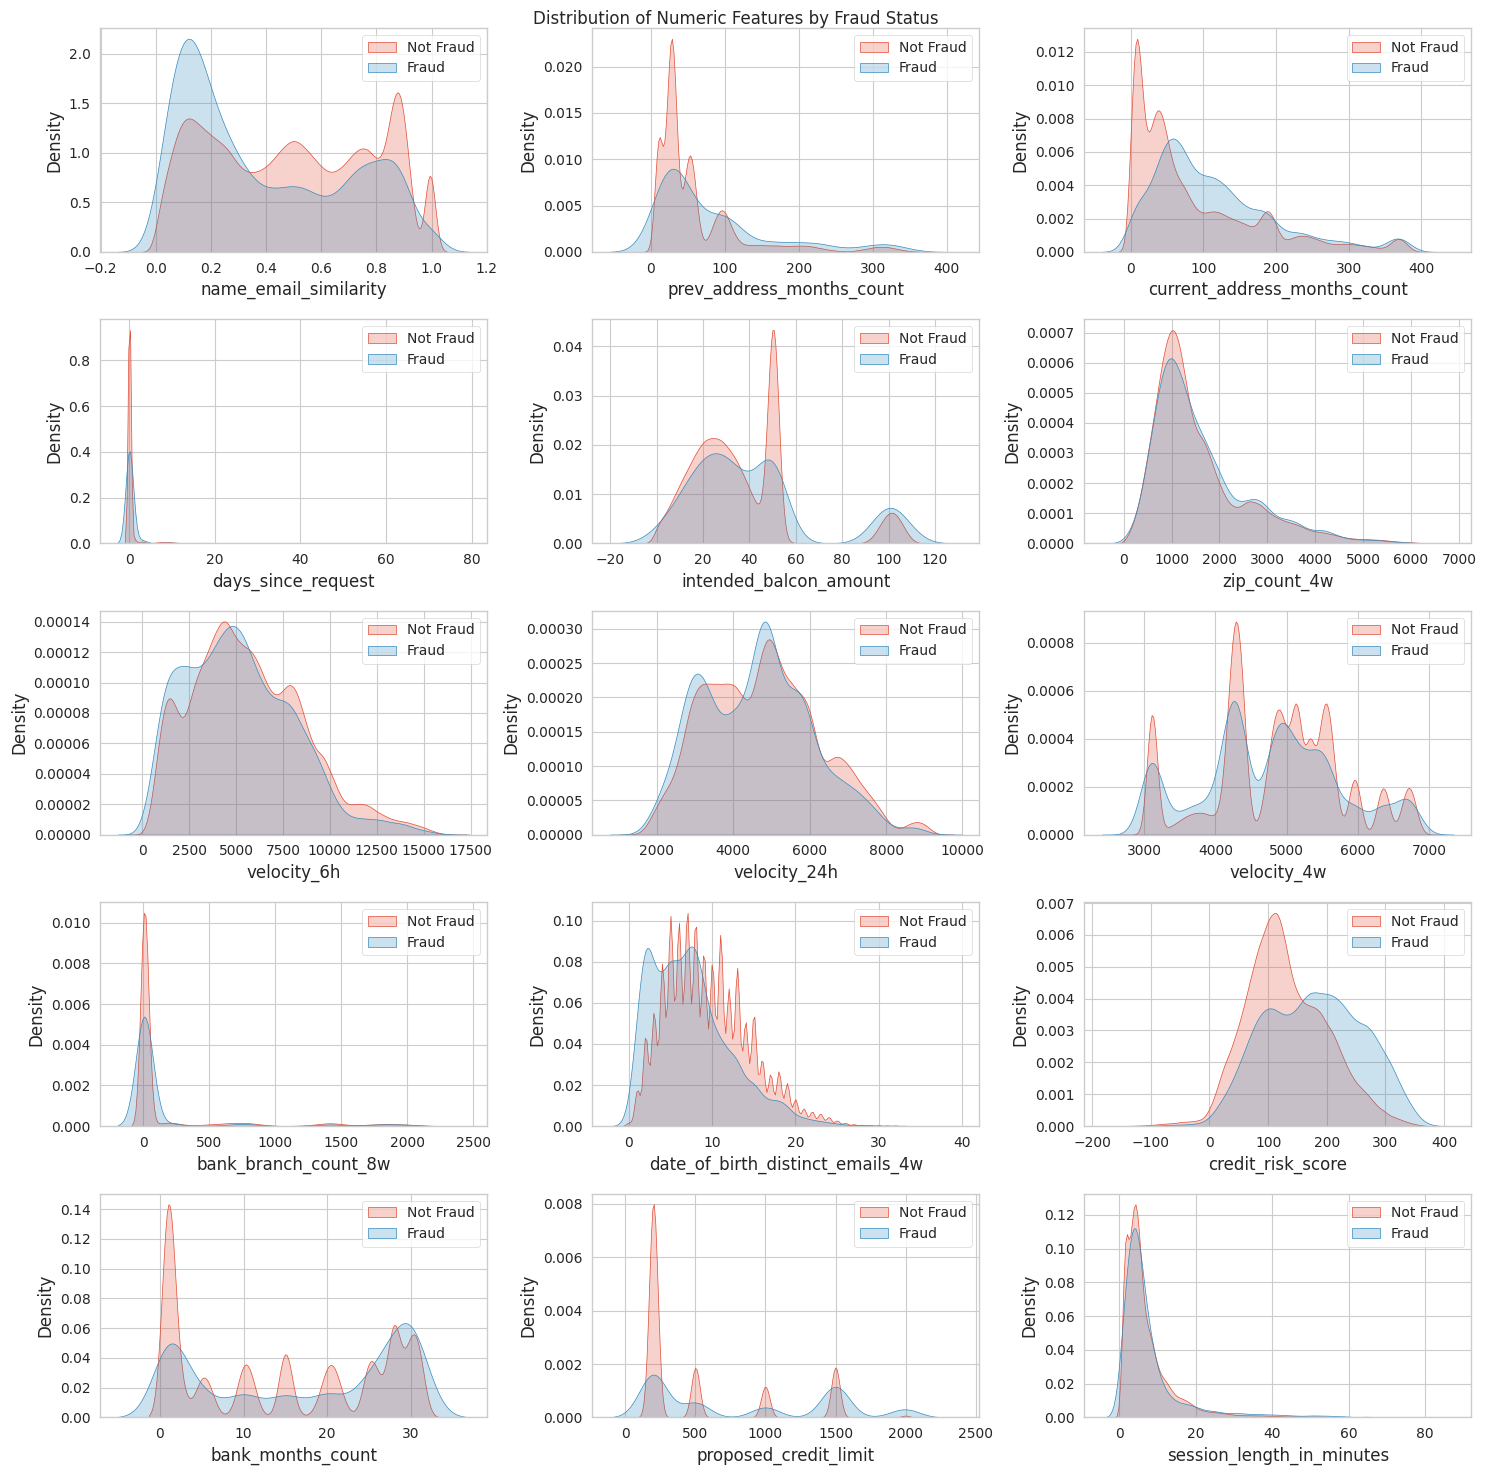

In [44]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_86130/3863268507.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
/tmp/ipykernel_86130/3863268507.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Fraud', 'Fraud'])
/tmp/ipykernel_86130/3863268507.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
/tmp/ipykernel_86130/3863268507.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios. 

Considering the potential impact on model performance, it is important to exercise caution and explore alternative approaches that preserve the integrity of the imbalanced data while addressing outliers, such as robust modeling techniques or outlier detection methods specifically designed for imbalanced datasets.

# 2. Feature Engineering for Fraud Detection of Bank Account Applications

### 2.1 One-Hot Encoding for Categorical Features

In [ ]:
# Create a list of categorical features in the DataFrame new_df whose data type is `object`
categorical_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

print(categorical_features)

In [ ]:
# Convert categorical variables into dummy variables using one-hot encoding
new_df = pd.DataFrame(pd.get_dummies(new_df, prefix=categorical_features))

In [ ]:
# Display the first 5 rows of the DataFrame
new_df.head()

In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

One-hot encoding categorical features is a valuable technique that transforms them into a format suitable for machine learning. It represents each category as a binary variable, capturing their distinctness and independence. By utilising one-hot encoding, the algorithm can effectively incorporate categorical information during model training. This enables better prediction and accurate decision-making based on the categorical feature values.

### 2.2 Min-Max Scaling for Numerical Features

In [ ]:
# Import the necessary libraries for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features)], remainder='passthrough')

# Fit the preprocessor on the training set and transform both the training and testing sets
X_scaled = preprocessor.fit_transform(X)
# X_test_scaled = preprocessor.transform(X_test)

In [ ]:
# Get the names of the features after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

In [ ]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

MinMax scaling is employed to normalise numerical features within a specific range, usually 0 to 1. This technique standardises the features, ensuring equitable evaluation during training. By applying MinMax scaling, the numerical features become comparable, resulting in more dependable and precise outcomes from the machine learning algorithm.

# 3. Feature Selection for Fraud Detection of Bank Account Applications

In [ ]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier

### Resampling for Effective Feature Selection Tests

In [ ]:
# Import the necessary libraries for undersampling imbalanced datasets
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_scaled_nm))

Undersampling the imbalanced dataset for feature selection tests has been carried out to address the issue of class imbalance. By reducing the instances of the majority class, the dataset becomes more balanced, allowing for a fairer evaluation of the feature selection process. This approach helps mitigate any potential bias towards the majority class and ensures that the selected features are robust and informative for both classes. 

In [ ]:
# Create a list of categorical features in the DataFrame X_scaled_nm
categorical_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 2 and X_scaled_nm[feature].nunique() < 10]

print(categorical_features)

In [ ]:
# Create a list of numerical features in the DataFrame X_scaled_nm
numeric_features = [feature for feature in X_scaled_nm.columns if X_scaled_nm[feature].nunique() >= 10]

print(numeric_features)

### 3.1 Variance Threshold Test for Constant Features

In [ ]:
# Instantiate a VarianceThreshold selector and fit it to the NearMiss-resampled training set
selector = VarianceThreshold()
selector.fit(X_scaled_nm)

# Get the names of the constant features
constant_features = [feature for feature in X_scaled_nm.columns 
                     if feature not in X_scaled_nm.columns[selector.get_support()]]

# Print the names of the constant features
print(constant_features)

In [ ]:
# Dropping constant features
X_scaled_nm.drop(['device_fraud_count'], axis=1, inplace=True)

Features with no variance have been dropped from the dataset to improve the quality of the analysis. These features provide no useful information as they exhibit the same value across all instances. By removing them, we eliminate redundancy and reduce noise, enabling a more focused and accurate exploration of the remaining features. 

### 3.2 Pearson Correlation Test for Multicollinearity

In [ ]:
# Compute correlation matrix
X_train_corr = X_scaled_nm[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

To assess multicollinearity within the dataset, Pearson correlation coefficient was employed as a measure of linear relationship between features. This statistical analysis helped identify potential correlations between variables. Fortunately, no features displayed a correlation exceeding 0.67, indicating a lack of strong linear dependencies. 

### 3.3 Chi-Squared Test for Categorical Features

In [ ]:
# Check the distribution of values in a column
X_scaled_nm.device_distinct_emails_8w.value_counts()

In [ ]:
# Identify the rows to drop based on a condition on a specific feature
rows_to_drop = np.where(X_scaled_nm['device_distinct_emails_8w'] < 0)[0]
rows_to_drop

# Drop the corresponding rows in X_train and y_train
X_train_cat = X_scaled_nm[categorical_features].copy()
X_train_cat.drop(rows_to_drop, axis=0, inplace=True)

y_train_cat = y_scaled_nm.copy()
y_train_cat.drop(rows_to_drop, axis=0, inplace=True)

In [ ]:
# Use chi-squared test to evaluate the relationship between categorical features and the target variable
chi2_results = chi2(X_train_cat, y_train_cat)

In [ ]:
# Create a pandas DataFrame to store the chi-squared test results
chi2_results_df = pd.DataFrame(data={'feature': X_train_cat.columns, 'chi2': chi2_results[0], 'p_value': chi2_results[1]})

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_results_df.sort_values(by='chi2', ascending=False), x="feature", y="chi2", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between categorical features and the target variable, a chi-squared test was conducted. This statistical analysis allowed us to evaluate the relationship between the categorical variables and the target feature. The results of the chi-squared test unveiled an intriguing insight: among the examined categorical features, `customer_age` stood out as the most influential predictor of the target variable.

In [ ]:
# Use SelectKBest with chi-squared test to select the top 5 categorical features that are most strongly associated with the target variable
best_chi2_cols = SelectKBest(chi2, k=15)
best_chi2_cols.fit(X_train_cat, y_train_cat)

# Get the names of the top 5 features
best_chi2_features = [X_train_cat.columns[best_chi2_cols.get_support()]]

# Print the names of the top 5 features
print(best_chi2_features)

### 3.4 Mutual Information Test for Numeric Features

In [ ]:
# Create a new DataFrame with only the numeric features from the preprocessed training data
X_train_num = X_scaled_nm[numeric_features].copy()

# Create a copy of the target variable
y_train_num = y_scaled_nm.copy()

In [ ]:
# Use mutual information test to evaluate the relationship between numerical features and the target variable
mutual_info_results = mutual_info_classif(X_train_num, y_train_num)

In [ ]:
# Create a pandas DataFrame to store the mutual information test results
mutual_info_results_df = pd.DataFrame(data={'feature': X_train_num.columns, 'mutual_info': mutual_info_results})

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=mutual_info_results_df.sort_values(by='mutual_info', ascending=False), x="feature", y="mutual_info", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("mutual_info", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Mutual Information Value by Numerical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

To explore the connection between numeric features and the target variable, a mutual information test was conducted. This statistical analysis allowed us to evaluate the relationship between the numeric variables and the target feature. The results of the mutual information test unveiled an intriguing insight: among the examined numeric features, `bank_months_count`, `current_address_months_count`, and `prev_address_months_count` stood out as the most influential predictor of the target variable.

In [ ]:
# Use SelectKBest with mutual information test to select the top 5 numerical features that are most strongly associated with the target variable
best_mutual_info_cols = SelectKBest(mutual_info_classif, k=15)
best_mutual_info_cols.fit(X_train_num, y_train_num)

# Get the names of the top 5 features
best_mutual_info_features = [X_train_num.columns[best_mutual_info_cols.get_support()]]

# Print the names of the top 5 features
print(best_mutual_info_features)

### 3.5 Extra Trees Classifier for Feature Selection

In [ ]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_nm, y_scaled_nm)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_nm.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(best_extra_features)

In [ ]:
extra_importances = pd.DataFrame({'feature': X_scaled_nm.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

In [ ]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The decision to employ the ExtraTreesClassifier for feature selection was motivated by its robustness and compatibility with our dataset. In contrast to the chi-squared and mutual information tests, the ExtraTreesClassifier yielded different outcomes. After evaluating various features using this model, we identified the most influential predictors for the target feature. Notably, `employment_status_CA`, `phone_home_valid`, `customer_age`, `payment_type_AC`, and `phone_mobile_valid` emerged as the top features. 

# 4. Fraud Detection Model Training Functions using SMOTE and Grid Search CV

SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling technique used to tackle class imbalance problems. Unlike random under-sampling, SMOTE generates synthetic data points to create an equal balance between the minority and majority class. It picks the distance between the closest neighbors of the minority class to create new synthetic points. SMOTE retains more information since no rows are eliminated, unlike random under-sampling. However, SMOTE can take longer to train due to the generation of synthetic data. 

When using SMOTE or undersampling techniques, it is crucial not to apply them before cross-validation. This is because it can influence the validation set before the cross-validation process, leading to overfitting. By doing so, we risk introducing data leakage. Instead, we should generate synthetic data points during cross-validation to avoid affecting the validation set. In this way, synthetic data is created only for the training set, ensuring that the validation set remains untouched.

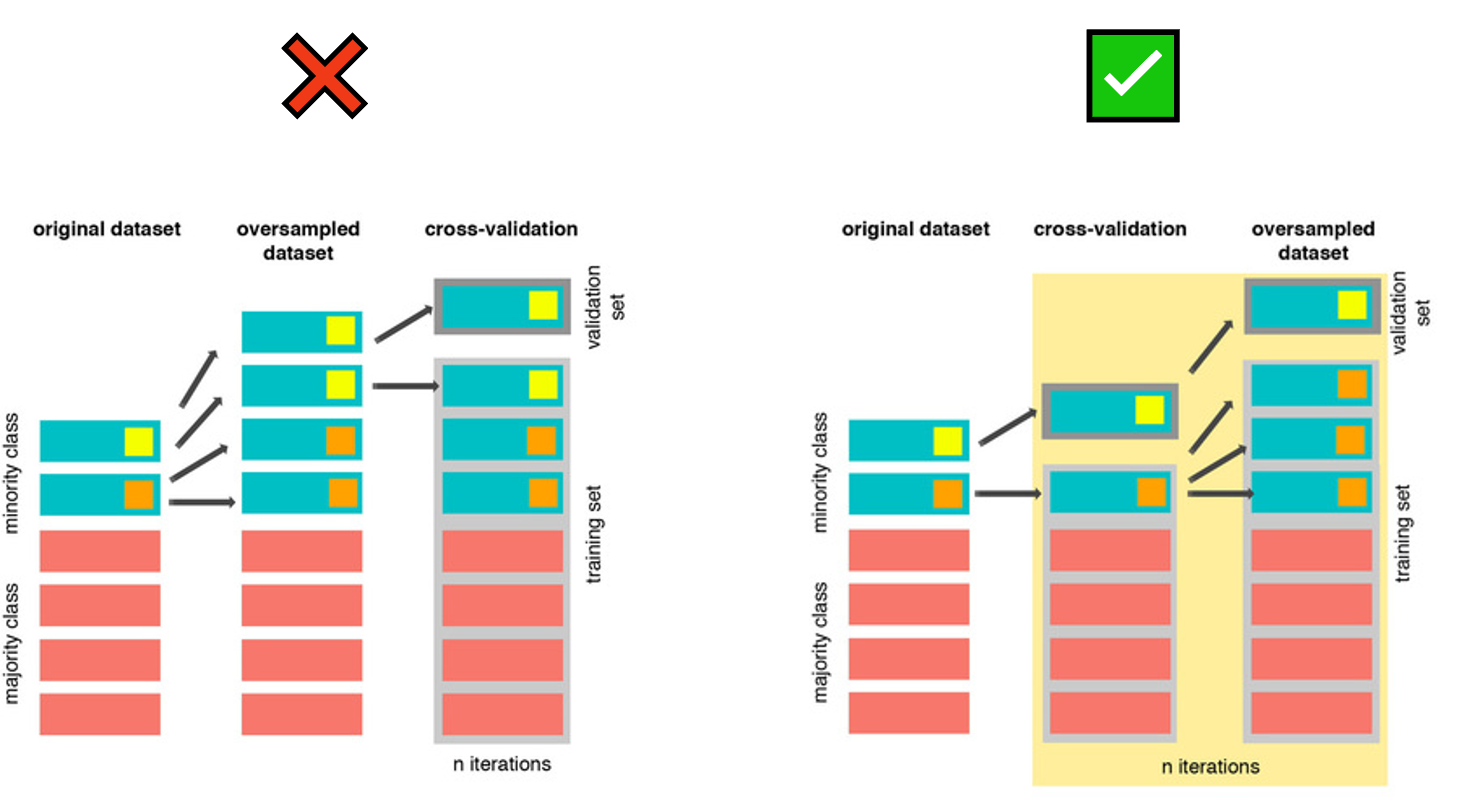

In [ ]:
# Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline

In [ ]:
# Import necessary modules for hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [ ]:
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random'):
    """
    Train a classifier using the specified parameters and return the trained model.
    
    Parameters:
    classifier (sklearn estimator): The estimator to train.
    param_dist (dict): The distribution of parameters to search over.
    X_train (pandas DataFrame): The training features.
    y_train (pandas Series): The training target.
    encoded_features (list): A list of encoded categorical features.
    search_type (str, optional): The type of hyperparameter search to perform. Must be either 'random' or 'grid'. Defaults to 'random'.
    
    Returns:
    A trained classifier.
    """
    
    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)
        
    # Create pipeline with SMOTENC and the classifier
    pipeline = make_pipeline(smote_nc, classifier)
    
    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline, 
                                      param_distributions=param_dist,
                                      n_iter=20,
                                      scoring="roc_auc",
                                      n_jobs=-1,
                                      cv=cv)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv)
    else:
        raise ValueError('search_type must be either "random" or "grid"')
        
    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv


# 5. Fraud Detection Model Testing Functions using Recall and ROC-AUC

Accuracy alone may not be a reliable metric for evaluating bank account fraud models, especially when dealing with imbalanced datasets. Instead, precision, recall, and F1 score are better options. Among these metrics, recall at a 5% FPR is ideal for minimising false negatives and reducing the risk of flagging legitimate transactions as fraudulent, which can lead to customer attrition. Prioritising the identification of fraudulent transactions while minimising false positives can help prevent customer loss.

In addition, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are also useful tools for evaluating the performance of fraud detection models. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR), allowing one to assess the trade-off between sensitivity and specificity. AUC measures the overall performance of the model, with a higher value indicating better performance. While recall at a 5% FPR is the primary metric for this project, ROC and AUC can provide additional insights into the model's performance.

<br>

$$ Recall = {TP \over TP + FN}  $$

<br>

$$ False\;Positive\;Rate = {FP \over FP + TN} $$

<br>

In [ ]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

### 5.1 Classification Report for Model Testing

In [ ]:
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])
    
    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

### 5.2 Confusion Matrix for Model Testing

In [ ]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    ax.imshow(con_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Define the tick marks and the labels for the plot
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Add the count of each cell of the confusion matrix to the plot
    fmt = 'd'
    threshold = con_matrix.max() / 2.
    for i, j in np.ndindex(con_matrix.shape):
        ax.text(j, i, format(con_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if con_matrix[i, j] > threshold else "black")

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

### 5.3 Cross-Validation Results for Model Testing

In [ ]:
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

### 5.4 ROC-AUC for Model Testing

In [ ]:
def plot_roc_curves(fpr_list, tpr_list, label_list):
    plt.figure(figsize=(8, 8))
    for i in range(len(fpr_list)):
        # Compute the ROC AUC score
        roc_auc_score = auc(fpr_list[i], tpr_list[i])
        # Plot the ROC curve
        plt.plot(fpr_list[i], tpr_list[i], label=f'{label_list[i]} (AUC={roc_auc_score:.2f})')
    
    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [ ]:
def test_classifier(classifier, X_test, y_test):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.
    
    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.
        
    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """
    
    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]
    
    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    # Print the classification report for both default and target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()
    
    # Display the plots
    plt.show()

    return fpr, tpr, default_recall, target_recall


# 6. Tree-Based Machine Learning Algorithms for Fraud Detection of Bank Account Applications

Tree-based models like XGBoost and LightGBM are ideal for this imbalanced dataset. They handle outliers effectively and excel in classifying tabular data. These algorithms do not require feature scaling and can automatically select the most important features, eliminating the need for manual feature engineering. By capturing intricate relationships and utilising informative features, they provide reliable predictions even with unusual data points. With their robustness, performance, and feature selection capabilities, tree-based models offer a comprehensive and powerful solution for this task.

In [ ]:
# Importing tree-based classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Resampling for Effective Model Training

In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

In [ ]:
# Dropping constant features from Variance Threshold test
X.drop(['device_fraud_count'], axis=1, inplace=True)

# # Selecting features from ExtraTreesClassifier test
# selected_features = [feature.replace('scaled__', '') for feature in best_extra_features]
# X = X[selected_features]

In [ ]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y)}')

# Define the NearMiss undersampling object with a sampling strategy of 0.1 and all available CPU cores
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_nm, y_nm = nm.fit_resample(X, y)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_nm))

In [ ]:
# Import the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.25, random_state=42, stratify=y_nm)

In [ ]:
# Get the indices of the encoded features in the training set
encoded_features = [X_train.columns.get_loc(str(feature)) for feature in X_train.columns if X_train[feature].nunique() >= 2 and X_train[feature].nunique() < 10]

In [ ]:
# Importing the pickle library to save and load machine learning models
import pickle

In [ ]:
# Load pickled model
dt_model = pickle.load(open('./models/dt_model.pkl', 'rb'))
rf_model = pickle.load(open('./models/rf_model.pkl', 'rb'))
xgb_model = pickle.load(open('./models/xgb_model.pkl', 'rb'))
lgb_model = pickle.load(open('./models/lgb_model.pkl', 'rb'))

### 6.1 Tree-Based Algorithm 1: DecisionTree

In [69]:
# Instantiate a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Define a dictionary of hyperparameters for DecisionTreeClassifier
dt_params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
             'decisiontreeclassifier__max_depth': [2, 4, 6, 8, 10],
             'decisiontreeclassifier__max_features': ['sqrt', 'log2']
            }

In [70]:
# %%time

# # Train a DecisionTree classifier using 'train_classifier' function and the given parameters
# dt_model = train_classifier(dt, dt_params, X_train, y_train, encoded_features)

In [71]:
print_cv_results(dt_model)

mean_test_score: 0.842254, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'entropy'}

mean_test_score: 0.840947, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}

mean_test_score: 0.838595, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'gini'}

mean_test_score: 0.832961, params: {'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__criterion': 'gini'}

mean_test_score: 0.828990, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'gini'}

mean_test_score: 0.827870, params: {'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__max_depth': 10, 'decisiontreecla

Default Threshold

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.96      0.85      0.90     27573

       Fraud       0.30      0.64      0.41      2757



    accuracy                           0.83     30330

   macro avg       0.63      0.75      0.66     30330

weighted avg       0.90      0.83      0.86     30330



Target Threshold @ 0.71

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.95      0.95      0.95     27573

       Fraud       0.47      0.46      0.46      2757



    accuracy                           0.90     30330

   macro avg       0.71      0.70      0.71     30330

weighted avg       0.90      0.90      0.90     30330




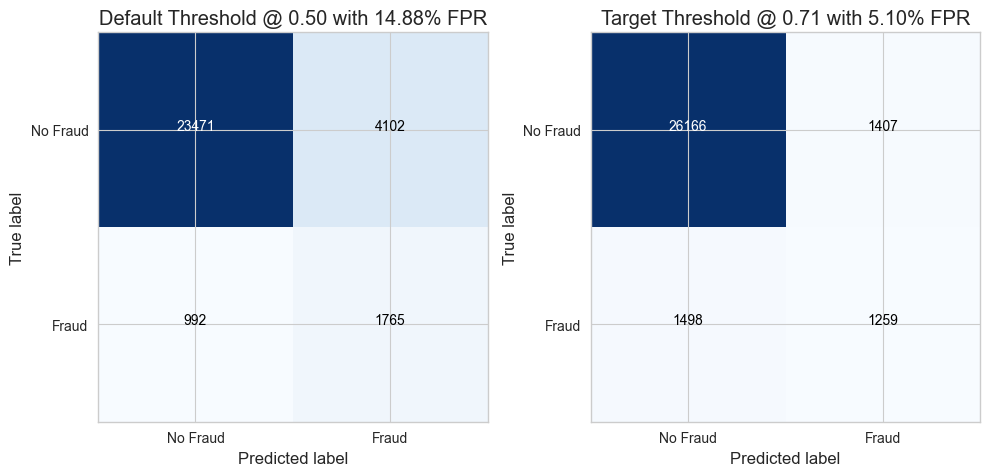

In [72]:
# Testing the DecisionTree model using the test data and calculating metrics
dt_fpr, dt_tpr, dt_default_recall, dt_target_recall = test_classifier(dt_model, X_test, y_test)

**Using a classification threshold of 0.71:**

* *True Positives (TP)*: The DecisionTree model successfully captured 1259 out of 2757 positive instances.

* *False Positives (FP)*:  There were 1407 instances where the model incorrectly classified negative instances as positive. (FP)

* *True Negatives (TN)*:  It also correctly classified 26166 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 1498 instances where it failed to capture the positive class (FN).

### 6.2 Tree-Based Algorithm 2: RandomForest

In [73]:
# Instantiate a RandomForestClassifier model
rf = RandomForestClassifier()

# Define a dictionary of hyperparameters for RandomForestClassifier
rf_params = {'randomforestclassifier__n_estimators': [20, 40, 60, 80, 100],
            'randomforestclassifier__criterion': ['gini', 'entropy'],
            'randomforestclassifier__max_depth': [2, 4, 6, 8, 10],
            'randomforestclassifier__max_features': ['sqrt', 'log2']
            }

In [74]:
# %%time

# # Train a RandomForest classifier using 'train_classifier' function and the given parameters
# rf_model = train_classifier(rf, rf_params, X_train, y_train, encoded_features)

In [75]:
print_cv_results(rf_model)

mean_test_score: 0.922236, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}

mean_test_score: 0.922222, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}

mean_test_score: 0.921951, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'entropy'}

mean_test_score: 0.920839, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'entropy'}

mean_test_score: 0.918329, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'log2', 'rando

Default Threshold

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.97      0.94      0.95     27573

       Fraud       0.53      0.69      0.60      2757



    accuracy                           0.92     30330

   macro avg       0.75      0.81      0.77     30330

weighted avg       0.93      0.92      0.92     30330



Target Threshold @ 0.54

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.96      0.95      0.96     27573

       Fraud       0.56      0.64      0.60      2757



    accuracy                           0.92     30330

   macro avg       0.76      0.80      0.78     30330

weighted avg       0.93      0.92      0.92     30330




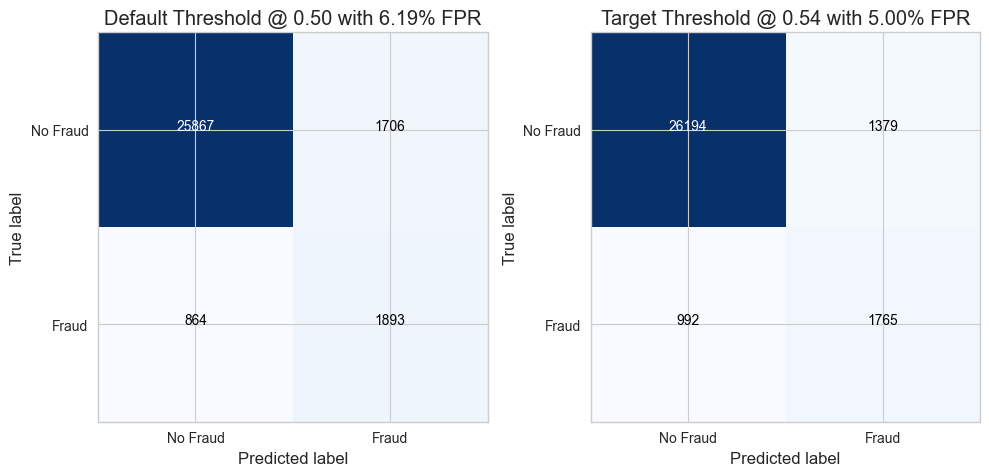

In [76]:
# Testing the RandomForest model using the test data and calculating metrics
rf_fpr, rf_tpr, rf_default_recall, rf_target_recall = test_classifier(rf_model, X_test, y_test)

**Using a classification threshold of 0.54:**

* *True Positives (TP)*: The RandomForest model successfully captured 1765 out of 2757 positive instances.

* *False Positives (FP)*:  there were 1379 instances where the model incorrectly classified negative instances as positive.

* *True Negatives (TN)*:  It also correctly classified 26194 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 992 instances where it failed to capture the positive class (FN).

### 6.3 Tree-Based Algorithm 3: XGBoost

In [77]:
# Instantiate a XGBClassifier model with GPU acceleration for training
xgb = XGBClassifier(tree_method='gpu_hist')

# Define a dictionary of hyperparameters for XGBClassifier
xgb_params = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

In [78]:
# %%time

# # Train a XGBoost classifier using 'train_classifier' function and the given parameters
# xgb_model = train_classifier(xgb, xgb_params, X_train, y_train, encoded_features)

In [79]:
print_cv_results(xgb_model)

mean_test_score: 0.949144, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 0.8}

mean_test_score: 0.948942, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 1.0}

mean_test_score: 0.948738, params: {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 3, 'xgbclassifier__max_depth': 8, 'xgbclassifier__learning_rate': 0.15, 'xgbclassifier__colsample_bytree': 0.8}

mean_test_score: 0.947004, params: {'xgbclassifier__subsample': 1.0, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytr

Default Threshold

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.97      0.98      0.97     27573

       Fraud       0.75      0.67      0.71      2757



    accuracy                           0.95     30330

   macro avg       0.86      0.82      0.84     30330

weighted avg       0.95      0.95      0.95     30330



Target Threshold @ 0.26

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.98      0.95      0.96     27573

       Fraud       0.61      0.78      0.68      2757



    accuracy                           0.93     30330

   macro avg       0.79      0.86      0.82     30330

weighted avg       0.94      0.93      0.94     30330




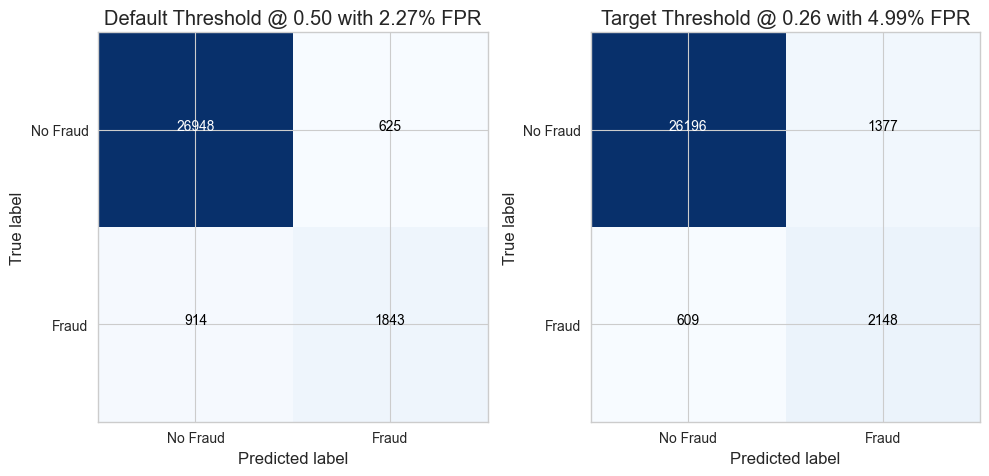

In [80]:
# Testing the XGBoost model using the test data and calculating metrics
xgb_fpr, xgb_tpr, xgb_default_recall, xgb_target_recall = test_classifier(xgb_model, X_test, y_test)

**Using a classification threshold of 0.26:**

* *True Positives (TP)*: The RandomForest model successfully captured 2148 out of 2757 positive instances.

* *False Positives (FP)*:  there were 1377 instances where the model incorrectly classified negative instances as positive.

* *True Negatives (TN)*:  It also correctly classified 26196 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 609 instances where it failed to capture the positive class (FN).

### 6.4 Tree-Based Algorithm 4: LightGBM

In [81]:
# Instantiate a LGBMClassifier model with GPU acceleration for training
lgb = LGBMClassifier(device='gpu')

# Define a dictionary of hyperparameters for LGBMClassifier
lgb_params = {'lgbmclassifier__max_depth': [2, 4, 6, 8, 10],
               'lgbmclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
               'lgbmclassifier__n_estimators': [20, 40, 60, 80, 100],
               'lgbmclassifier__min_child_weight': [1, 2, 3, 4],
               'lgbmclassifier__subsample': [0.6, 0.8, 1.0],
               'lgbmclassifier__colsample_bytree': [0.6, 0.8, 1.0]
              }

In [82]:
# %%time

# # Train a LightGBM classifier using 'train_classifier' function and the given parameters
# lgb_model = train_classifier(lgb, lgb_params, X_train, y_train, encoded_features)

In [83]:
print_cv_results(lgb_model)

mean_test_score: 0.950694, params: {'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 3, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__learning_rate': 0.2, 'lgbmclassifier__colsample_bytree': 0.8}

mean_test_score: 0.948535, params: {'lgbmclassifier__subsample': 0.6, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 1, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.8}

mean_test_score: 0.946468, params: {'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__n_estimators': 80, 'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__colsample_bytree': 0.8}

mean_test_score: 0.944875, params: {'lgbmclassifier__subsample': 0.8, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__min_child_weight': 2, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclas

Default Threshold

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.97      0.98      0.97     27573

       Fraud       0.75      0.68      0.71      2757



    accuracy                           0.95     30330

   macro avg       0.86      0.83      0.84     30330

weighted avg       0.95      0.95      0.95     30330



Target Threshold @ 0.30

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.98      0.95      0.96     27573

       Fraud       0.61      0.77      0.68      2757



    accuracy                           0.93     30330

   macro avg       0.79      0.86      0.82     30330

weighted avg       0.94      0.93      0.94     30330




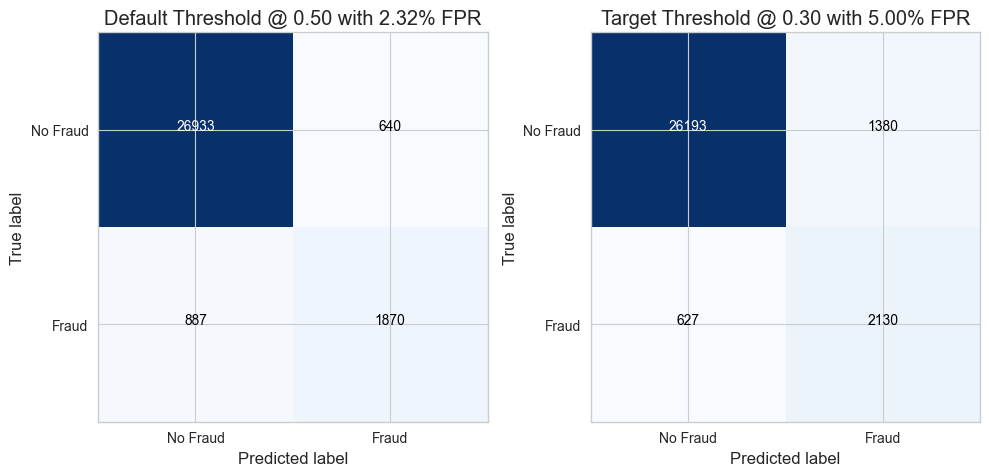

In [84]:
# Testing the LightGBM model using the test data and calculating metrics
lgb_fpr, lgb_tpr, lgb_default_recall, lgb_target_recall = test_classifier(lgb_model, X_test, y_test)

**Using a classification threshold of 0.30:**

* *True Positives (TP)*: The RandomForest model successfully captured 2130 out of 2757 positive instances.

* *False Positives (FP)*:  there were 1380 instances where the model incorrectly classified negative instances as positive.

* *True Negatives (TN)*:  It also correctly classified 26193 negative instances as true negatives (TN).

* *False Negatives (FN)*:  There were 627 instances where it failed to capture the positive class (FN).

### 6.5 Plotting ROC Curves and Comparing AUC Scores

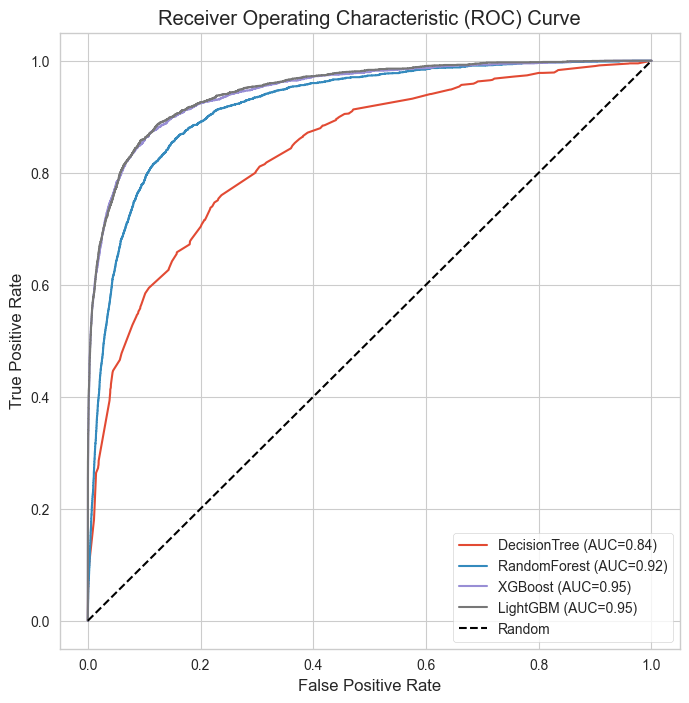

In [85]:
# Create lists of FPR and TPR values for each classifier
fpr_list = [dt_fpr, rf_fpr, xgb_fpr, lgb_fpr]
tpr_list = [dt_tpr, rf_tpr, xgb_tpr, lgb_tpr]

# Create a list of labels for each classifier
label_list = ['DecisionTree', 'RandomForest', 'XGBoost', 'LightGBM']

# Plot ROC curves for each classifier using the FPR, TPR, and label lists
plot_roc_curves(fpr_list, tpr_list, label_list)


The ROC-AUC results demonstrate the performance of different models in classifying the data. The DecisionTree model achieved an AUC of 0.84, indicating moderate predictive capability. The RandomForest model outperformed it with an AUC of 0.92, showcasing better predictive accuracy. Both XGBoost and LightGBM models exhibited superior performance, achieving an AUC of 0.95 each, suggesting excellent predictive power. The Random model, with an AUC of 0.5, performed randomly, indicating no predictive capability. These results highlight the varying effectiveness of the models in distinguishing between positive and negative instances, with XGBoost and LightGBM showcasing the highest discriminative ability.

### 6.6 Plotting Recall Scores for Fraud Class at Default and Target Thresholds

In [86]:
# Create a dataframe with the recall scores for each model
data = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Default Recall Score': [dt_default_recall[1], rf_default_recall[1], xgb_default_recall[1], lgb_default_recall[1]],
    'Target Threshold Recall Score': [dt_target_recall[1], rf_target_recall[1], xgb_target_recall[1], lgb_target_recall[1]]
})

# Sort the data by the threshold recall score in descending order
data = data.sort_values(by='Target Threshold Recall Score', ascending=False)

# Reshape the data
data = pd.melt(data, id_vars='Model', var_name='Metric', value_name='Score')

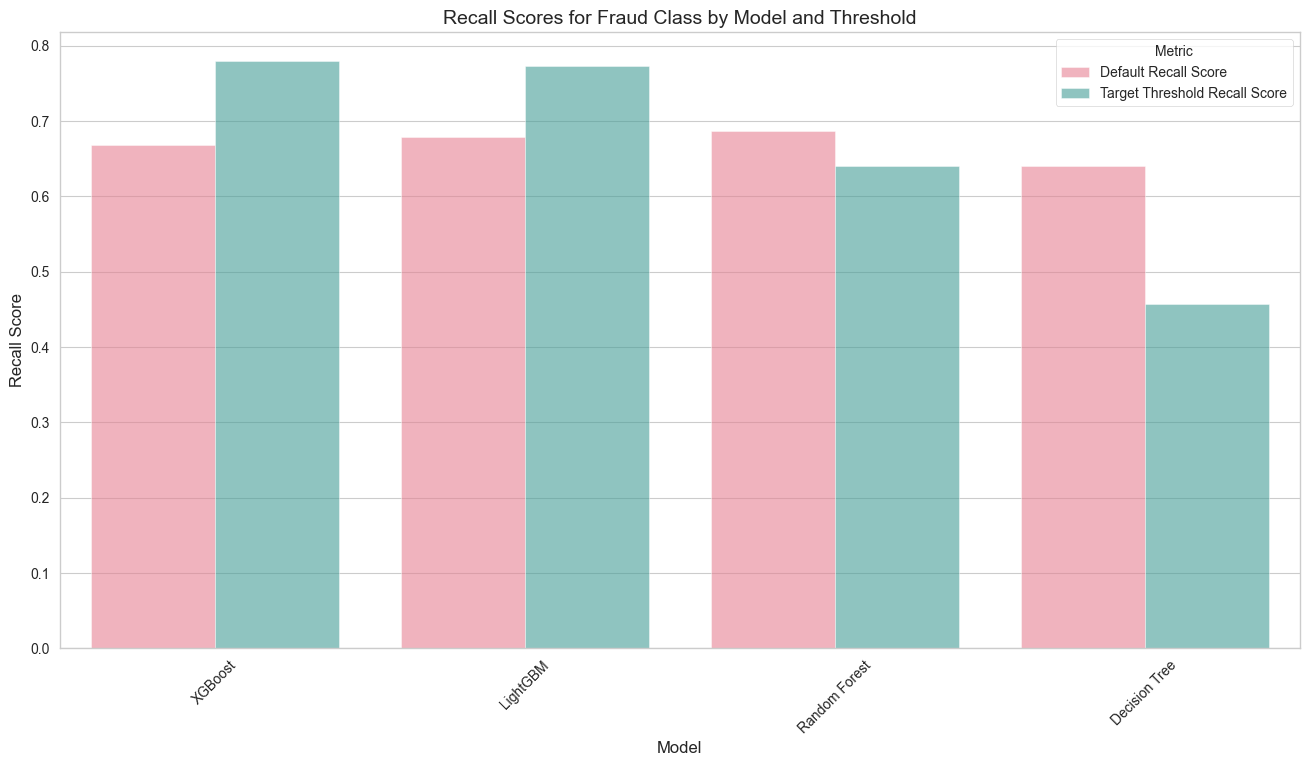

In [87]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create grouped bar plot
sns.barplot(
    data=data,
    x='Model',
    y='Score',
    hue='Metric',
    palette=my_palette,
    alpha=.6,
)

# Customize labels and legend
plt.xlabel("Model", fontsize=12)
plt.ylabel("Recall Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Recall Scores for Fraud Class by Model and Threshold", fontsize=14)
plt.legend(title="Metric", fontsize=10)

# Display plot
plt.show()

The recall at a 5% false positive rate provides insights into the models' ability to accurately identify positive instances while maintaining a low false positive rate. The DecisionTree model achieved a recall of 0.46, indicating that it correctly identified 46% of positive instances while maintaining the desired false positive rate. The RandomForest model performed better, achieving a recall of 0.64, indicating a higher proportion of correctly identified positive instances. Both XGBoost and LightGBM models demonstrated even higher recall values, with XGBoost achieving 0.78 and LightGBM achieving 0.77, showcasing their superior performance in accurately capturing positive instances while maintaining the specified false positive rate. These results highlight the varying effectiveness of the models in identifying positive instances while controlling the false positive rate, with XGBoost and LightGBM outperforming the other models.

# 7. Exporting Trained Machine Learning Model for Real-World Deployment

In [88]:
# # Importing the pickle library to save and load machine learning models
# import pickle

In [89]:
# # Pickle the model
# pickle.dump(dt_model, open('./models/dt_model.pkl', 'wb'))
# pickle.dump(rf_model, open('./models/rf_model.pkl', 'wb'))
# pickle.dump(xgb_model, open('./models/xgb_model.pkl', 'wb'))
# pickle.dump(lgb_model, open('./models/lgb_model.pkl', 'wb'))

### 7.1 Training the Final XGBoost Model with Optimal Hyperparameters

I encountered difficulties when attempting to deploy a pickled XGBoost model that included a pipeline or was trained using GPU. It seems there were compatibility issues, and I needed to handle additional dependencies and configurations to ensure successful deployment in the target environment. To address these challenges, I decided to proceed by selecting the best hyperparameters obtained through the optimisation process and training the model using CPU instead. This approach has proven effective in resolving the deployment issues I encountered, allowing me to continue with my project for now.

In [90]:
# Apply SMOTENC to deal with imbalanced classes
smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

In [91]:
%%time

# Perform NearMiss undersampling to handle imbalanced data
print(f'Train dataset samples per class {Counter(y_train)}')

# Apply SMOTENC to deal with imbalanced classes
sm = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)

# Perform SMOTE oversampling on the feature matrix X_nm and target variable y_nm
X_sm, y_sm = sm.fit_resample(X_train, y_train)

# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_sm))

Train dataset samples per class Counter({0: 82717, 1: 8272})

Resampled dataset shape Counter({0: 82717, 1: 82717})

Wall time: 1min 15s


In [92]:
# Instantiate final XGBClassifier model with GPU acceleration for training
xgb_final = XGBClassifier(n_estimators = 100, 
                        max_depth = 10, 
                        learning_rate = 0.15, 
                        min_child_weight = 2, 
                        subsample = 0.6, 
                        colsample_bytree = 0.8
                        )

In [93]:
# Train final XGBoost classifier using the best parameters
xgb_final.fit(X_sm, y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Default Threshold

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.97      0.98      0.97     27573

       Fraud       0.76      0.67      0.72      2757



    accuracy                           0.95     30330

   macro avg       0.87      0.83      0.84     30330

weighted avg       0.95      0.95      0.95     30330



Target Threshold @ 0.25

**************************************************

              precision    recall  f1-score   support



    No Fraud       0.98      0.95      0.96     27573

       Fraud       0.61      0.77      0.68      2757



    accuracy                           0.93     30330

   macro avg       0.79      0.86      0.82     30330

weighted avg       0.94      0.93      0.94     30330




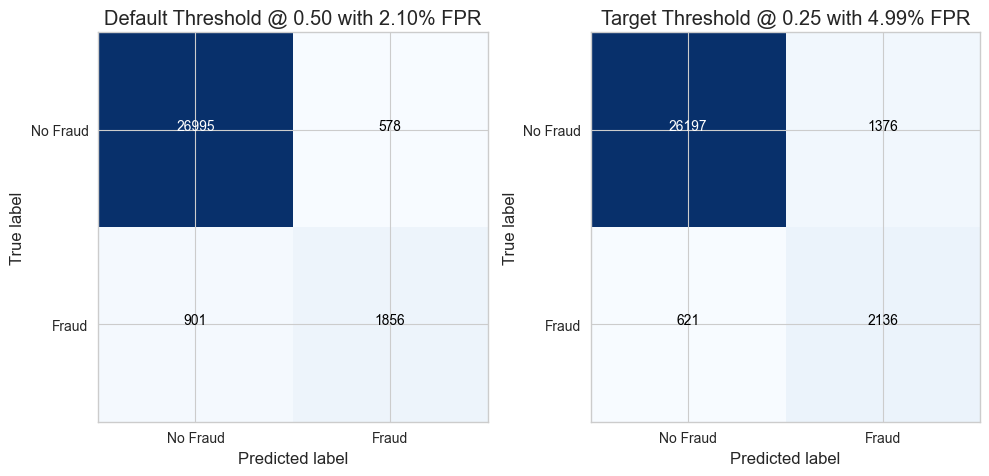

In [94]:
# Testing final XGBoost model using the test data and calculating metrics
xgb_final_fpr, xgb_final_tpr, xgb_final_default_recall, xgb_final_target_recall = test_classifier(xgb_final, X_test, y_test)

In [95]:
# Pickle the model
pickle.dump(xgb_final, open('./models/xgb_final.pkl', 'wb'))

### 7.2 Storing Test Data in SQLite3 Database

To simplify the generation of random test data in the user interface, I have implemented a solution where the test data is saved to a SQLite3 database table. This enables the generation of random test rows with just a click of a button, allowing for quick and convenient testing of the web application.

In [96]:
# Importing the sqlite3 library to save testing dataframe
import sqlite3

In [97]:
# Connect to the database
conn = sqlite3.connect('bank-account-fraud.db')

# Save the dataframe to the database
X_test.to_sql('X_test', conn, if_exists='replace', index=False)

# Close the connection
conn.close()